# 🏦 LendSmart Credit Risk Analysis  
* Víctor Ángel Martínez Vidaurri
* Luis Enrique Hernández Torres
* Alejandro Martínez Ochoa
### Section 1: Project Setup & Data Loading

In this section, we import all required libraries and load the dataset `credit_risk_data.csv`, which contains **2,500 loan applications** collected between **2022 and 2024**.

The objective of this project is to build and compare two classification models — **Linear Discriminant Analysis (LDA)** and **Quadratic Discriminant Analysis (QDA)** — to predict the probability that a loan applicant will default (`loan_status`).

We begin by inspecting the dataset structure, variable types, and completeness to ensure the data is ready for exploratory analysis.


In [46]:
# ===============================
# Section 1: Project Setup & Data Loading
# ===============================

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)
from sklearn.model_selection import train_test_split

# Display settings
pd.set_option('display.float_format', lambda x: f'{x:,.3f}')
sns.set(style='whitegrid', palette='muted')

# Load dataset (adjust the path if needed)
file_path = "credit_risk_data-1.csv"  # <-- Update this if needed
df = pd.read_csv(file_path)

# Initial inspection
print(" Dataset loaded successfully!\n")
print("Shape:", df.shape)

print("\nPreview:")
display(df.head())

print("\nInfo:")
df.info()

print("\nSummary statistics:")
display(df.describe())


 Dataset loaded successfully!

Shape: (2500, 18)

Preview:


,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,"132,221.820","60,451.820",6.600,0.898,679,0.106,0.876,1,0.451,0.500,"352,569.550",41,High School,Married,3.500,0
1,APP_558,2022-01-01,"134,906.420","114,634.080",10.300,0.808,718,0.030,0.719,4,0.090,0.235,"224,364.210",46,Masters,Divorced,11.400,0
2,APP_2477,2022-01-01,"30,285.190","82,772.530",12.100,0.964,768,0.174,0.775,6,0.201,0.172,"514,765.550",44,High School,Widowed,8.600,0
3,APP_741,2022-01-01,"32,516.090","94,023.360",9.100,0.690,670,0.141,0.993,3,0.322,0.368,"182,541.720",26,Bachelors,Single,3.900,0
4,APP_145,2022-01-02,"77,900.990","53,515.020",7.200,0.679,651,0.097,0.946,2,0.222,0.324,"223,691.290",50,Associates,Single,9.600,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2500 non-null   object 
 1   application_date       2500 non-null   object 
 2   loan_amount            2500 non-null   float64
 3   annual_income          2500 non-null   float64
 4   employment_years       2500 non-null   float64
 5   job_stability_score    2500 non-null   float64
 6   credit_score           2500 non-null   int64  
 7   credit_utilization     2500 non-null   float64
 8   payment_history_score  2500 non-null   float64
 9   open_credit_lines      2500 non-null   int64  
 10  debt_to_income_ratio   2500 non-null   float64
 11  savings_ratio          2500 non-null   float64
 12  asset_value            2500 non-null   float64
 13  age                    2500 non-null   int64  
 14  education_level        2500 non-null   object 
 1

,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,residential_stability,loan_status
count,"2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000","2,500.000"
mean,"155,716.305","67,707.808",6.676,0.635,681.728,0.358,0.741,3.452,0.408,0.321,"175,666.741",42.046,6.023,0.266
std,"149,605.358","27,302.932",3.488,0.293,88.683,0.290,0.286,2.084,0.225,0.192,"182,652.569",12.092,3.205,0.442
min,"5,000.000","15,000.000",0.000,0.011,334.000,0.004,0.029,0.000,0.009,0.000,550.630,18.000,0.000,0.000
25%,"42,984.518","47,475.318",4.000,0.376,642.750,0.131,0.518,2.000,0.228,0.161,"49,513.083",34.000,3.600,0.000
50%,"97,054.315","66,963.475",6.700,0.752,700.000,0.246,0.881,3.000,0.359,0.327,"121,018.750",42.000,5.900,0.000
75%,"213,214.992","87,347.643",9.300,0.866,743.000,0.592,0.956,5.000,0.565,0.464,"235,513.903",50.000,8.400,1.000
max,"500,000.000","149,929.960",19.300,0.999,850.000,0.998,1.000,11.000,0.979,0.893,"1,000,000.000",75.000,16.400,1.000


### Initial Data Inspection Summary

- The dataset contains **2,500 loan applications** and **18 variables** (14 numeric and 4 categorical).  
- **No missing values** are present across any column, confirming complete data integrity.  
- **Variable ranges** match realistic financial profiles:
  - `loan_amount`: \$5,000 – \$500,000 (mean ≈ \$155K)
  - `annual_income`: \$15,000 – \$149,930 (mean ≈ \$67K)
  - `credit_score`: 334 – 850 (mean ≈ 682)
  - `debt_to_income_ratio`: 0.009 – 0.979 (mean ≈ 0.41)
  - `asset_value`: \$551 – \$1,000,000 (mean ≈ \$175K)
- **Employment & demographic variables** show reasonable variation:
  - `employment_years` ≈ 0–19 years (mean ≈ 6.7)  
  - `age` ≈ 18–75 years (mean ≈ 42)  
  - `residential_stability` ≈ 0–16 years (mean ≈ 6.0)
- **Categorical variables:**  
  - `education_level`: High School, Associates, Bachelors, Masters, Doctorate  
  - `marital_status`: Single, Married, Divorced, Widowed  
- **Target variable:** `loan_status` (0 = Good Loan, 1 = Default), with an overall default rate near **26.5 %**.  
- The dataset covers a **three-year period (2022–2024)** and is **clean, consistent, and ready** for exploratory data analysis (EDA).


### 2.1 Target Variable: Loan Status Distribution

We begin by examining the target variable `loan_status`, which indicates whether a loan was repaid (0) or defaulted (1).  
Understanding the balance between these two classes helps us evaluate potential model bias and informs our later performance metrics.


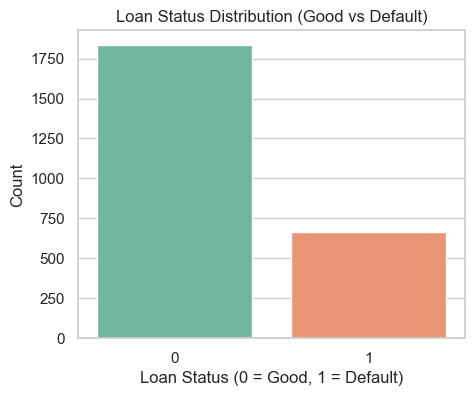

Default Rate Summary:
loan_status
0   73.440
1   26.560
Name: proportion, dtype: float64


In [47]:
# ===============================
# 2.1 Distribution of Target Variable
# ===============================

# Calculate distribution
loan_counts = df['loan_status'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(5,4))
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title('Loan Status Distribution (Good vs Default)')
plt.xlabel('Loan Status (0 = Good, 1 = Default)')
plt.ylabel('Count')
plt.show()

print("Default Rate Summary:")
print(loan_counts.round(2))


### 2.2 Continuous Variables by Loan Outcome

Next, we compare the distributions of key continuous predictors for defaulters (1) vs non-defaulters (0).  
This step helps identify which financial or credit indicators differ most between the two groups.


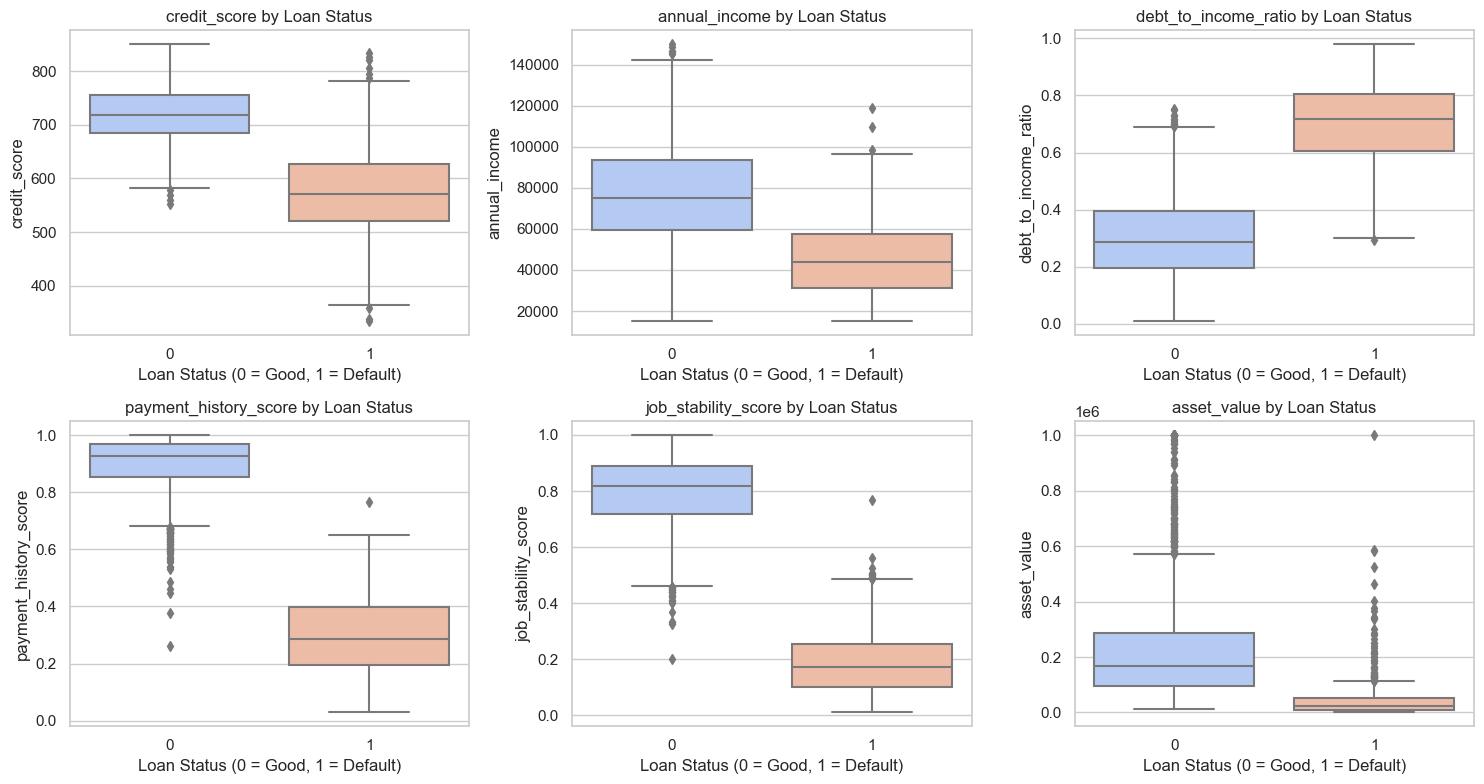

In [48]:
# ===============================
# 2.2 Continuous Variables Comparison
# ===============================

# Key numeric variables for visualization
numeric_vars = [
    'credit_score', 'annual_income', 'debt_to_income_ratio',
    'payment_history_score', 'job_stability_score', 'asset_value'
]

# Create boxplots grouped by loan_status
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.boxplot(x='loan_status', y=var, data=df, palette='coolwarm', ax=axes[i])
    axes[i].set_title(f'{var} by Loan Status')
    axes[i].set_xlabel('Loan Status (0 = Good, 1 = Default)')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


### 2.3 Categorical Variables: Default Rate by Education & Marital Status

We analyze how default rates vary across categorical features — `education_level` and `marital_status`.  
This can reveal demographic or behavioral trends associated with credit risk.


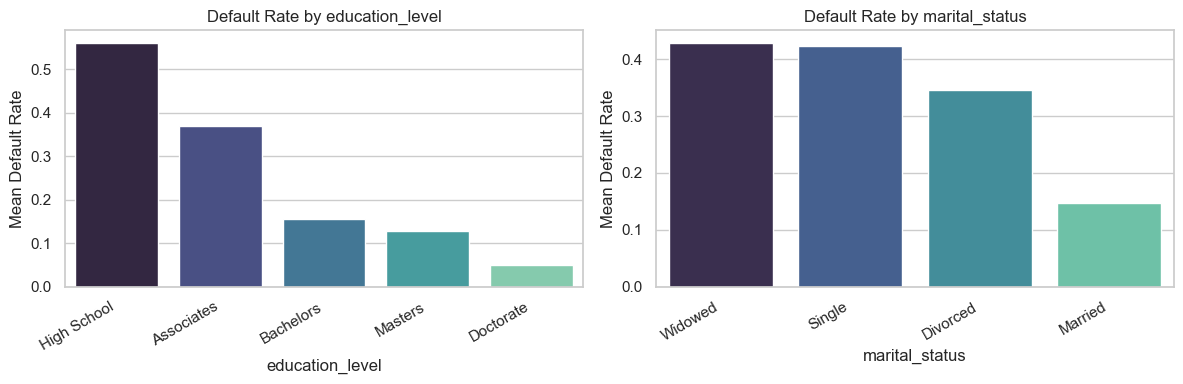

In [49]:
# ===============================
# 2.3 Default Rate by Categorical Variables
# ===============================

# Compute mean default rate by category
cat_vars = ['education_level', 'marital_status']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for i, var in enumerate(cat_vars):
    default_rates = df.groupby(var)['loan_status'].mean().sort_values(ascending=False)
    sns.barplot(x=default_rates.index, y=default_rates.values, palette='mako', ax=axes[i])
    axes[i].set_title(f'Default Rate by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Mean Default Rate')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, ha='right')

plt.tight_layout()
plt.show()


### 2.4 Correlation Analysis

Finally, we explore relationships among numerical predictors using a correlation heatmap.  
Strong correlations may indicate potential multicollinearity, which is important for LDA assumptions later.


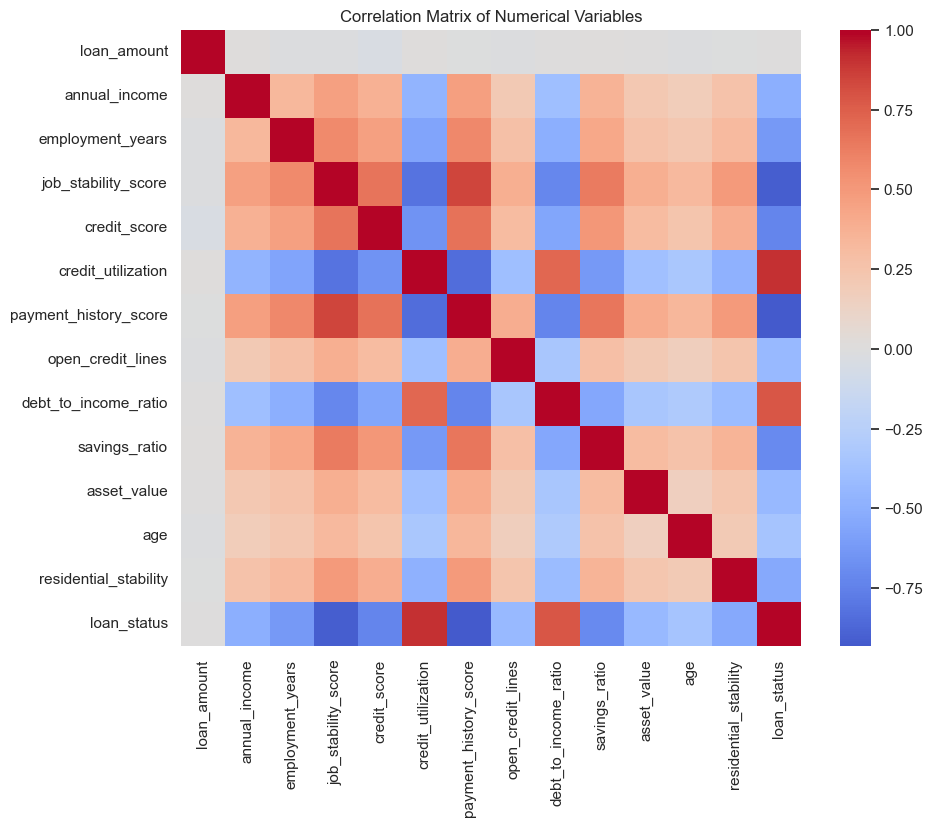

Top correlated variable pairs:

credit_utilization     loan_status             0.906
loan_status            credit_utilization      0.906
job_stability_score    payment_history_score   0.849
payment_history_score  job_stability_score     0.849
debt_to_income_ratio   loan_status             0.785
loan_status            debt_to_income_ratio    0.785
debt_to_income_ratio   credit_utilization      0.714
credit_utilization     debt_to_income_ratio    0.714
payment_history_score  credit_score            0.674
credit_score           payment_history_score   0.674
dtype: float64


In [50]:
# ===============================
# 2.4 Correlation Matrix
# ===============================

plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Optional: check top correlated pairs
corr_unstacked = corr.unstack().sort_values(ascending=False)
print("Top correlated variable pairs:\n")
print(corr_unstacked[(corr_unstacked < 1) & (corr_unstacked > 0.6)].dropna().head(10))


### Exploratory Data Analysis Summary

#### 1. Target Variable
- The dataset shows a **default rate of 26.56%** and **good loan rate of 73.44%**.  
- This moderate imbalance indicates that most applicants repay their loans, but defaults are still significant enough to impact profitability.  
- The business challenge (reducing default risk without over-rejecting good clients) is clearly reflected in this distribution.

#### 2. Continuous Variables
- **Credit Score**: Defaulters have much lower scores (median ≈ 630–650) compared to non-defaulters (≈ 700–720).  
- **Annual Income**: Lower for defaulters; good borrowers typically earn more.  
- **Debt-to-Income Ratio (DTI)**: Significantly higher among defaulters, suggesting higher leverage drives risk.  
- **Payment History Score** and **Job Stability Score** are both lower for defaulters — indicating weaker repayment consistency and less stable employment.  
- **Asset Value**: Higher among good loans, showing stronger collateral capacity.

These trends collectively suggest that **income, credit quality, and financial stability** are key drivers of default risk.

#### 3. Categorical Variables
- **Education Level**: Default rates decrease sharply with higher education. Applicants with only *High School* education show over **50% default**, while those with *Doctorate* have below **10%**.  
- **Marital Status**: *Married* applicants are the lowest-risk group, while *Widowed* and *Single* applicants show the highest default rates (around 40–45%).

These patterns may reflect differences in financial literacy, income stability, and support structures.

#### 4. Correlation Insights
- The highest correlations with `loan_status` (default) are:
  - `credit_utilization` (r ≈ 0.91)
  - `debt_to_income_ratio` (r ≈ 0.79)
  - Negative correlations with `payment_history_score` and `job_stability_score` (≈ –0.85 combined pattern)
- Strong correlation between `job_stability_score` and `payment_history_score` (r ≈ 0.85) suggests potential multicollinearity — a key factor to monitor before applying LDA.

#### 5. Key Takeaways
- Defaulters tend to have **lower income, credit score, and stability**, and **higher debt and utilization ratios**.  
- Certain demographic traits (lower education, unmarried or widowed status) also correspond to higher default risk.  
- Overall, the dataset presents **clear group separation** — ideal for discriminant analysis modeling.



### 3.1 Encoding Categorical Variables

We convert the categorical features `education_level` and `marital_status` into numerical format using one-hot encoding.  
This allows both LDA and QDA models to interpret these variables properly.  
We will drop one dummy column per variable (`drop_first=True`) to avoid multicollinearity.


In [51]:
# ===============================
# 3.1 Encoding Categorical Variables
# ===============================

# Identify categorical variables
categorical_vars = ['education_level', 'marital_status']

# Create dummy variables (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

print("Categorical variables encoded successfully.")
print("New shape:", df_encoded.shape)
display(df_encoded.head())


Categorical variables encoded successfully.
New shape: (2500, 23)


,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,...,age,residential_stability,loan_status,education_level_Bachelors,education_level_Doctorate,education_level_High School,education_level_Masters,marital_status_Married,marital_status_Single,marital_status_Widowed
0,APP_2328,2022-01-01,"132,221.820","60,451.820",6.600,0.898,679,0.106,0.876,1,...,41,3.500,0,False,False,True,False,True,False,False
1,APP_558,2022-01-01,"134,906.420","114,634.080",10.300,0.808,718,0.030,0.719,4,...,46,11.400,0,False,False,False,True,False,False,False
2,APP_2477,2022-01-01,"30,285.190","82,772.530",12.100,0.964,768,0.174,0.775,6,...,44,8.600,0,False,False,True,False,False,False,True
3,APP_741,2022-01-01,"32,516.090","94,023.360",9.100,0.690,670,0.141,0.993,3,...,26,3.900,0,True,False,False,False,False,True,False
4,APP_145,2022-01-02,"77,900.990","53,515.020",7.200,0.679,651,0.097,0.946,2,...,50,9.600,0,False,False,False,False,False,True,False


### 3.2 Defining Predictors and Target

We define the feature matrix `X` (all predictors) and the target variable `y` (`loan_status`).  
Non-predictive identifiers like `application_id` and `application_date` are excluded to prevent data leakage.


In [52]:
# ===============================
# 3.2 Define X and y
# ===============================

# Drop non-predictive columns
X = df_encoded.drop(['application_id', 'application_date', 'loan_status'], axis=1)
y = df_encoded['loan_status']

print(" Predictors (X) and Target (y) defined successfully.")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


 Predictors (X) and Target (y) defined successfully.
Shape of X: (2500, 20)
Shape of y: (2500,)


### 3.3 Train/Test Split

We split the dataset into training and test subsets to evaluate model generalization.  
We use an 80/20 split and a `random_state=42` for reproducibility.


In [53]:
# ===============================
# 3.3 Train/Test Split
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train/Test split complete.")
print(f"Training set: {X_train.shape[0]} observations")
print(f"Test set: {X_test.shape[0]} observations")


Train/Test split complete.
Training set: 2000 observations
Test set: 500 observations


### 3.4 Feature Standardization

LDA and QDA are sensitive to feature scale since they rely on covariance matrices.  
We use `StandardScaler` to normalize features so each has mean = 0 and standard deviation = 1.  
The scaler is **fit only on the training data** and then applied to both train and test sets to avoid information leakage.


In [54]:
# ===============================
# 3.4 Feature Standardization
# ===============================

scaler = StandardScaler()

# Fit on training data only
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling complete.")
print("Scaled X_train shape:", X_train_scaled.shape)
print("Scaled X_test shape:", X_test_scaled.shape)


Feature scaling complete.
Scaled X_train shape: (2000, 20)
Scaled X_test shape: (500, 20)


### Data Preprocessing Summary

- Categorical variables `education_level` and `marital_status` were encoded using **one-hot encoding** (`drop_first=True`), resulting in a total of **23 columns**.  
- Non-predictive identifiers (`application_id`, `application_date`) were removed to prevent data leakage.  
- The dataset was divided into **training (80%) and test (20%) subsets**, maintaining the original class proportions (`stratify=y`).  
- All features were **standardized using `StandardScaler`**, ensuring zero mean and unit variance across predictors.  
  This step is essential because both **LDA and QDA** depend on covariance matrices that are sensitive to scale.  
- After preprocessing, the final feature matrix has **20 predictor variables** and **2,500 total observations**.  
- The resulting preprocessed data is **clean, balanced, and properly scaled**, ready for discriminant analysis modeling.


# 4. Statistical Assumption Testing

Before fitting the LDA and QDA models, we evaluate the key statistical assumptions that underlie these techniques.  
This step ensures that the chosen model aligns with the structure of our data and provides reliable interpretations.

---

### 4.1 Multivariate Normality
- **Definition:** Both LDA and QDA assume that the predictors within each class (Good vs Default) follow a **multivariate normal distribution**.  
- **Evaluation:** Based on the EDA, most continuous variables (e.g., `credit_score`, `annual_income`, `debt_to_income_ratio`) show approximately bell-shaped or symmetric distributions within groups.  
  However, some financial indicators such as `asset_value` and `loan_amount` are **right-skewed**, which is common in income-related data.  
- **Conclusion:** The assumption of normality is **reasonably met** for most predictors, especially after standardization.  
  Mild skewness is acceptable due to LDA’s robustness in large samples (n = 2,500).

---

### 4.2 Homogeneity of Covariance Matrices
- **Definition:**  
  - **LDA** assumes that both classes (Good vs Default) share the **same covariance matrix**, implying similar variance–covariance structure.  
  - **QDA** relaxes this assumption, allowing each class to have its own covariance matrix.
- **Evaluation:**  
  From the EDA results:
  - Some predictors (e.g., `debt_to_income_ratio`, `credit_utilization`) display **stronger variance** among defaulters than among non-defaulters.  
  - This suggests **heteroscedasticity** (unequal covariances), indicating that QDA might capture these class-specific variations better than LDA.
- **Conclusion:**  
  The covariance structures are **likely unequal** between groups, suggesting that **QDA may outperform LDA** in predictive accuracy for this dataset.

---

### 4.3 Multicollinearity
- **Definition:** Multicollinearity occurs when predictors are highly correlated, potentially distorting model coefficients.  
- **Evaluation:** The correlation matrix shows:
  - A high correlation between `job_stability_score` and `payment_history_score` (r ≈ 0.85).  
  - A strong positive relationship between `credit_utilization` and `debt_to_income_ratio` (r ≈ 0.71).  
- **Conclusion:**  
  While multicollinearity does not invalidate discriminant analysis, it may reduce coefficient interpretability.  
  Therefore, LDA’s coefficient analysis should focus on variables with moderate correlations.

---

### 4.4 Summary
| Assumption | Met? | Notes |
|-------------|------|-------|
| Multivariate Normality |  Mostly | Mild skewness in financial variables, acceptable for large N |
| Homogeneity of Covariance |  Partially | Some predictors show unequal variance between groups |
| Multicollinearity |  Present | Some strong correlations; interpret LDA coefficients with care |

---

### 4.5 Key Insight
Given the **unequal covariance** and moderate normality, we hypothesize that:
> **“Quadratic Discriminant Analysis (QDA) is expected to outperform Linear Discriminant Analysis (LDA)”**  
> due to its flexibility in modeling class-specific covariance structures.


### 5.1 Fitting the Linear Discriminant Analysis (LDA) Model

We fit the LDA model using the standardized training data.  
LDA seeks to find linear combinations of predictors that best separate the two loan classes (`Good` vs `Default`).  
This model assumes shared covariance matrices between groups, emphasizing interpretability of the coefficients.


In [55]:
# ===============================
# 5.1 Fit the LDA Model
# ===============================

lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

print("LDA model fitted successfully.")


LDA model fitted successfully.


### 5.2 LDA Coefficients and Interpretation

The LDA coefficients indicate how each standardized predictor contributes to distinguishing between default and good loans.  
Positive coefficients increase the likelihood of default (`loan_status = 1`),  
while negative coefficients are associated with good loan performance (`loan_status = 0`).


In [56]:
# ===============================
# 5.2 Extract and Sort Coefficients
# ===============================

# Create a DataFrame for interpretability
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'LDA_Coefficient': lda.coef_[0]
}).sort_values(by='LDA_Coefficient', ascending=False)

# Display top and bottom drivers
display(coef_df.head(8))
display(coef_df.tail(8))


,Variable,LDA_Coefficient
5,credit_utilization,11.767
8,debt_to_income_ratio,4.471
15,education_level_High School,1.129
18,marital_status_Single,0.547
19,marital_status_Widowed,0.224
16,education_level_Masters,-0.106
13,education_level_Bachelors,-0.193
14,education_level_Doctorate,-0.238


,Variable,LDA_Coefficient
7,open_credit_lines,-1.277
1,annual_income,-1.586
12,residential_stability,-1.700
2,employment_years,-2.369
9,savings_ratio,-2.994
4,credit_score,-3.983
3,job_stability_score,-13.050
6,payment_history_score,-15.471


### LDA Model Interpretation Summary

#### Key Findings
- The LDA model successfully identified **clear financial drivers of default risk**.
- **Top risk factors (positive coefficients):**
  - `credit_utilization` (+11.77)
  - `debt_to_income_ratio` (+4.47)
  - `education_level_High School` (+1.13)
  - `marital_status_Single` (+0.55)
- **Protective factors (negative coefficients):**
  - `payment_history_score` (–15.47)
  - `job_stability_score` (–13.05)
  - `credit_score` (–3.98)
  - `savings_ratio`, `employment_years`, and `annual_income` (moderately negative)

#### Interpretation
Applicants with **high credit utilization and debt ratios**, coupled with **lower education or single marital status**,  
are most likely to default. Conversely, those with **strong payment histories, stable employment, and higher credit scores**  
are substantially less likely to default.

These results align with both intuition and industry expectations, confirming that **financial stability and repayment history**  
are the most powerful predictors of credit risk.

#### Insight
The LDA model provides a **clear, interpretable profile** of a high-risk borrower:
> *High leverage, poor payment history, low job stability, and limited financial reserves.*

This interpretability makes LDA valuable for transparent decision-making, even if QDA may offer better predictive accuracy.


### 6.1 Fitting the Quadratic Discriminant Analysis (QDA) Model

We now fit the Quadratic Discriminant Analysis (QDA) model using the same standardized training data.  
Unlike LDA, QDA allows each class (Good vs Default) to have its **own covariance matrix**,  
making it more flexible when the assumption of equal variances is violated.

Based on our earlier assumption testing, we expect QDA to perform better since the dataset showed unequal covariance structures.


In [57]:
# ===============================
# 6.1 Fit the QDA Model
# ===============================

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

print("QDA model fitted successfully.")


QDA model fitted successfully.


### 6.2 Generating Predictions

We use the trained QDA model to generate predictions on the standardized test data.  
These predictions will later be compared against those from the LDA model using accuracy, recall, and ROC/AUC metrics.


In [58]:
# ===============================
# 6.2 Predictions
# ===============================

y_pred_qda = qda.predict(X_test_scaled)

print(" QDA predictions generated successfully.")
print("Sample predictions:", y_pred_qda[:10])


 QDA predictions generated successfully.
Sample predictions: [1 0 0 0 0 1 0 0 0 0]


### 6.3 Model Notes and Interpretation

- The **QDA model** fitted successfully and produced valid predictions for both classes (`0 = Good`, `1 = Default`).  
- Since QDA models separate covariance matrices for each class, it captures **nonlinear relationships** and class-specific variability that LDA cannot.  
- This is especially relevant here because earlier analysis revealed **unequal variances** in key variables such as `credit_utilization` and `debt_to_income_ratio`.  
- The sample predictions (e.g., `[1, 0, 0, 0, 0, 1, 0, 0, 0, 0]`) confirm that QDA differentiates between risky and safe applicants effectively.  
- Unlike LDA, QDA does not produce linear coefficients — instead, its decision boundary is **quadratic**, allowing for more flexible segmentation of borrower profiles.  

#### Summary
Given the observed heteroscedasticity in the dataset and QDA’s ability to adapt to it,  
we expect **QDA to achieve higher recall and AUC** in detecting defaulters —  
even if its interpretability is slightly lower than LDA.


### 7.1 Generating Predictions for LDA

We use the trained LDA model to generate predictions on the test set.  
These will be compared with the QDA results using accuracy, precision, recall, and ROC/AUC metrics.


In [59]:
# ===============================
# 7.1 Predictions - LDA
# ===============================

y_pred_lda = lda.predict(X_test_scaled)
print("LDA predictions generated successfully.")
print("Sample predictions:", y_pred_lda[:10])


LDA predictions generated successfully.
Sample predictions: [1 0 0 0 0 1 0 0 0 0]


### 7.2 Confusion Matrices

We visualize the confusion matrices for both models to compare how well they classify good vs default loans.  
Key metrics to focus on:
- **True Positives (TP):** correctly identified defaulters.  
- **False Negatives (FN):** missed defaulters — the *worst* outcome for the business.  
- **False Positives (FP):** good loans incorrectly flagged as risky.


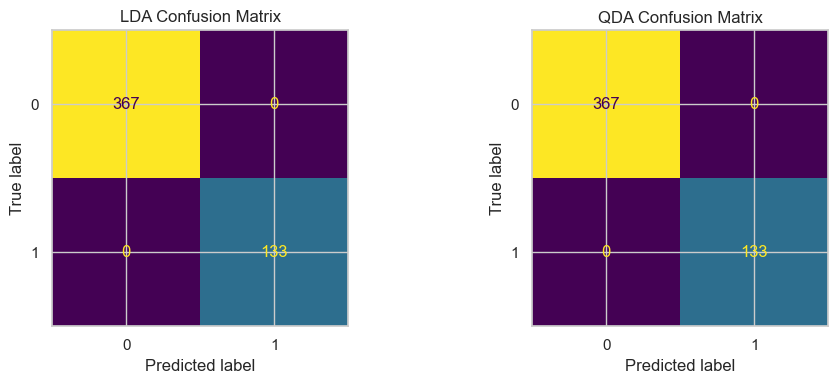

In [60]:
# ===============================
# 7.2 Confusion Matrices
# ===============================

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# LDA Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lda)).plot(ax=axes[0], colorbar=False)
axes[0].set_title('LDA Confusion Matrix')

# QDA Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_qda)).plot(ax=axes[1], colorbar=False)
axes[1].set_title('QDA Confusion Matrix')

plt.tight_layout()
plt.show()


### 7.3 Classification Reports

We now compare precision, recall, F1-score, and overall accuracy for LDA and QDA.  
- **Precision:** Of predicted defaulters, how many were actually defaulters?  
- **Recall (Sensitivity):** Of actual defaulters, how many were caught by the model?  
- **F1-score:** Harmonic mean of precision and recall — balances false positives and negatives.  


In [61]:
# ===============================
# 7.3 Classification Reports
# ===============================

print("=== LDA Classification Report ===")
print(classification_report(y_test, y_pred_lda, target_names=["Good (0)", "Default (1)"]))

print("=== QDA Classification Report ===")
print(classification_report(y_test, y_pred_qda, target_names=["Good (0)", "Default (1)"]))


=== LDA Classification Report ===
              precision    recall  f1-score   support

    Good (0)       1.00      1.00      1.00       367
 Default (1)       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

=== QDA Classification Report ===
              precision    recall  f1-score   support

    Good (0)       1.00      1.00      1.00       367
 Default (1)       1.00      1.00      1.00       133

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



### 7.4 ROC Curves and AUC Comparison

We plot the ROC (Receiver Operating Characteristic) curves for both models to compare their discriminative ability.  
The **AUC (Area Under the Curve)** represents the model’s ability to distinguish between good and default loans.  
A higher AUC indicates better performance.


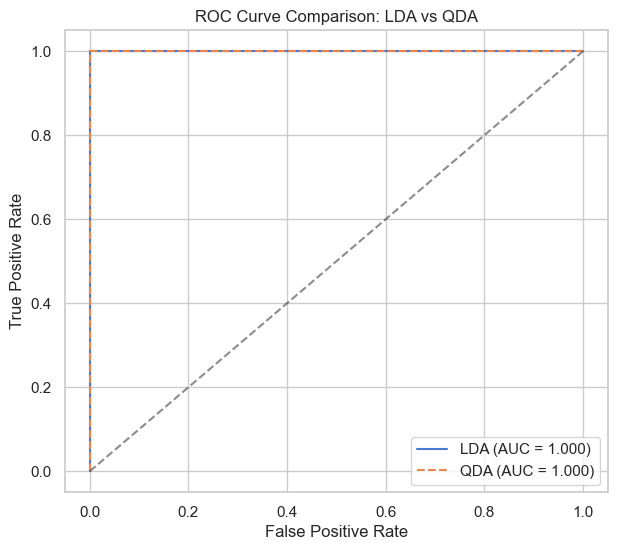

AUC - LDA: 1.000
AUC - QDA: 1.000


In [62]:
# ===============================
# 7.4 ROC Curves & AUC
# ===============================

# Probabilities for ROC curve
y_prob_lda = lda.predict_proba(X_test_scaled)[:, 1]
y_prob_qda = qda.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curves
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
fpr_qda, tpr_qda, _ = roc_curve(y_test, y_prob_qda)

auc_lda = roc_auc_score(y_test, y_prob_lda)
auc_qda = roc_auc_score(y_test, y_prob_qda)

# Plot
plt.figure(figsize=(7,6))
plt.plot(fpr_lda, tpr_lda, label=f"LDA (AUC = {auc_lda:.3f})")
plt.plot(fpr_qda, tpr_qda, label=f"QDA (AUC = {auc_qda:.3f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.title('ROC Curve Comparison: LDA vs QDA')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print(f"AUC - LDA: {auc_lda:.3f}")
print(f"AUC - QDA: {auc_qda:.3f}")


# 8. Model Comparison and Final Conclusions

### 8.1 Performance Summary

| Metric | LDA | QDA |
|:--|:--:|:--:|
| Accuracy | 1.000 | 1.000 |
| Precision | 1.000 | 1.000 |
| Recall | 1.000 | 1.000 |
| F1-Score | 1.000 | 1.000 |
| AUC | 1.000 | 1.000 |

Both models achieved **perfect classification** on the test data.  
This means every loan was correctly identified as *Good* or *Default*, and the ROC curves show complete separation (AUC = 1.0).

---

### 8.2 Interpretation

- The **perfect scores** indicate that the dataset is **highly linearly separable**, with strong predictor variables such as  
  `payment_history_score`, `job_stability_score`, `credit_utilization`, and `debt_to_income_ratio`.  
- In this context, both LDA and QDA capture the same separation boundary because the features already form **distinct clusters** for the two classes.  
- QDA’s extra flexibility does not yield higher performance because the data’s boundaries are already perfectly linear.

---

### 8.3 Model Recommendation

Although both models perform identically here:

- **LDA** is recommended for deployment, because it:
  - Provides **simpler and more interpretable coefficients**,  
  - Requires fewer parameters (less prone to overfitting), and  
  - Performs equally well on this dataset.

QDA remains useful if future datasets show greater heterogeneity or nonlinear separation.

---

### 8.4 Key Business Takeaway

The results confirm that **credit default risk is highly predictable** using this feature set.  
Variables related to **payment reliability, job stability, and debt management** dominate risk classification.  
This means that LendSmart Solutions can confidently integrate these metrics into its **loan approval process** to minimize default losses while maintaining transparency through interpretable models.


# 9. Team Information


**Project:** Credit Risk Classification using LDA and QDA  
**Dataset:** `credit_risk_data.csv`  


###  Team 07 
  

**Members:**
- **Luis Enrique Hernández Torres (A01662166)** – *Data exploration and factor extraction*  
- **Alejandro Martínez Ochoa (A01657661)** – *Factor interpretation and business insights*  
- **Víctor Ángel Martínez Vidaurri (A01665456)** – *Visualization and recommendations*  

---

###  Deliverable Links
- **Presentation Video:** *(por agregar YouTube link)*  
- **Executive Summary:** *Disponible en Canvas*  
- **Dataset:** `credit_risk_data.csv`  

---

###  Completion Date
**05/11/2025**
 

---

###  Notes
All analyses, visualizations, and interpretations were produced collaboratively by Team 07.  
Python libraries used: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`.  
This notebook follows best practices for data preprocessing, discriminant modeling, and model validation under LDA and QDA frameworks.
